In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

#DATA PREP
df = pd.read_csv('./data/boston_airbnb/listings.csv')

#remove columns with more than 50% missing values
missing_cols = set(df.columns[df.isnull().mean()>0.5])
df = df.drop(missing_cols, axis=1, inplace=False)

#replace "$" sign in price column, convert to numeric
df['price'] = df['price'].replace({'\$':''}, regex = True)
df['price'] = pd.to_numeric(df['price'] ,errors='coerce')

#drop rows with null prices
df.dropna(subset=['price'], axis=0)

#drop rows with prices more than $400
df = df[df['price']<=400]

print(df.shape)
print(df.columns)

(3459, 86)
Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'transit', 'access', 'interaction', 'house_rules', 'thumbnail_url',
       'medium_url', 'picture_url', 'xl_picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed', 'city', 'state', 'zipcode',
       'market', 'smart_location', 'country_code', 'country', 'latitude',
       'longitude', 'is_location_exact', 'property_type', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type',
    

In [2]:

df_1 = df.groupby(['neighbourhood']).agg({'id':"count", 'price':"mean", 'review_scores_rating':"mean", 'number_of_reviews':"mean", 'latitude':"mean",	'longitude':"mean"})
df_1 = df_1.sort_values("id", ascending=False)
print(df_1)
print(df_1.shape)


                     id       price  review_scores_rating  number_of_reviews  \
neighbourhood                                                                  
Allston-Brighton    359  107.331476             90.022642          14.284123   
Jamaica Plain       302  125.221854             94.451737          28.059603   
South End           283  185.109541             93.008511          17.469965   
Back Bay            265  214.709434             91.331707          15.067925   
Fenway/Kenmore      240  196.104167             89.281250          11.475000   
South Boston        198  185.949495             94.503067          20.722222   
Dorchester          195   97.451282             89.579882          33.138462   
Beacon Hill         165  188.151515             93.737931          20.157576   
North End           122  188.770492             93.876190          33.516393   
East Boston         117  124.059829             89.745283          39.623932   
Roxbury             110  120.136364     

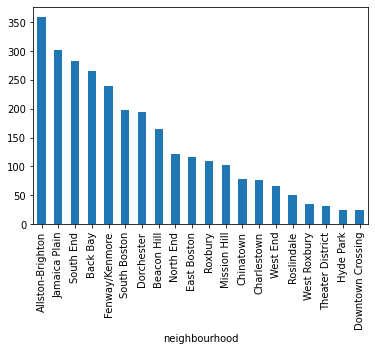

In [3]:
#number of listing by neighbourhood
df_1 = df_1.sort_values("id", ascending=False)
((df_1['id'][:20])).plot(kind="bar");

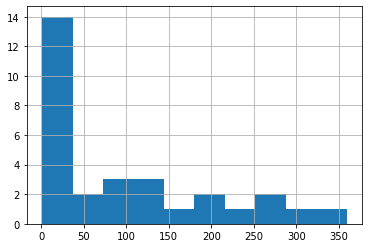

In [4]:
#histogram of number of listing by neighbourhood
df_1['id'].hist();

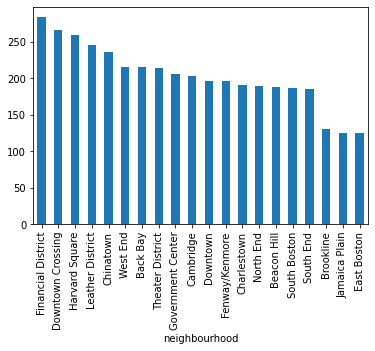

In [5]:
#mean price of listing by neighbourhood
df_1 = df_1.sort_values("price", ascending=False)
((df_1['price'][:20])).plot(kind="bar");

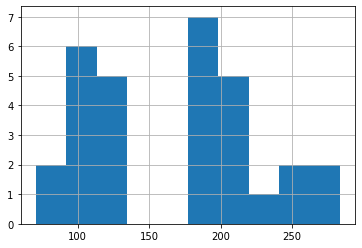

In [6]:
#histogram of mean price of listing by neighbourhood
df_1['price'].hist();

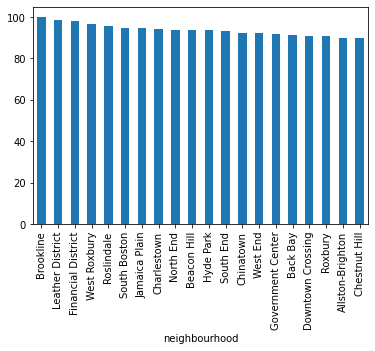

In [7]:
#mean review ratings by neighbourhood
df_1 = df_1.sort_values("review_scores_rating", ascending=False)
((df_1['review_scores_rating'][:20])).plot(kind="bar");

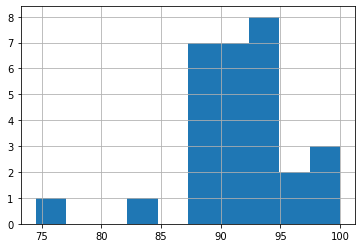

In [8]:
#histogram of review ratings by neighbourhood
df_1['review_scores_rating'].hist();

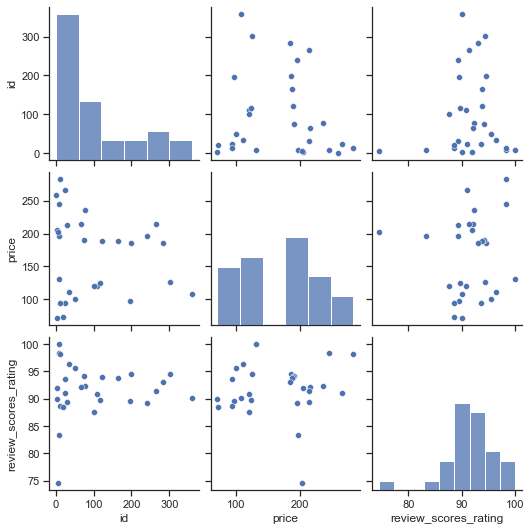

In [9]:
sns.set_theme(style="ticks")
sns.pairplot(df_1[['id','price','review_scores_rating']])

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

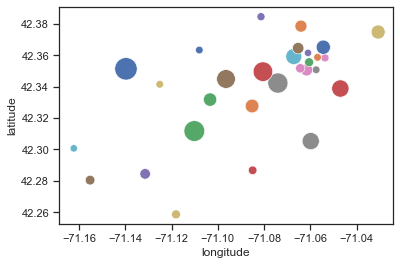

In [10]:
df_1 = df_1.sort_values("review_scores_rating", ascending=False)
sns.scatterplot(data=df_1, y="latitude", x="longitude", hue="review_scores_rating",size="id", sizes=(50, 500), palette="deep", legend=False)

In [11]:
df_2 = df_1.reset_index()

mapbox_key = 'pk.eyJ1IjoiamFjcXVlc211bGxlciIsImEiOiJja25wczZrMGswY2hkMnFuenIxdWtoNXRtIn0.yV19gFMMxl4AJSVsk7My5Q'

fig = px.scatter_mapbox(data_frame=df_2, lat="latitude", lon="longitude", color="review_scores_rating", size="id", hover_name='neighbourhood', zoom=10, size_max=30)

fig.update_layout(mapbox_style="light", mapbox_accesstoken=mapbox_key)

fig.show()